<center><h1>Singaravelou_Ritika_HW6</h1></center>

Name: Ritika Singaravelou
<br>
Github Username: ritika-singaravelou
<br>
USC ID: 6144091011

## 1. Tree-Based Methods

Import packages

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.svm import SVC

### (a) Download the APS Failure data

#### Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [2]:
train_df=pd.read_csv("../data/aps_failure_training_set.csv",skiprows=20, na_values='na')
test_df=pd.read_csv("../data/aps_failure_test_set.csv",skiprows=20, na_values='na')

In [3]:
train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [4]:
test_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


Note : We can observe a lot of null values in the given dataset. When the count of missing values is considerably high removing them can lead to loss of valuable information and is therefore not a good practice

### (b) Data Preparation

#### (i) Research what types of techniques are usually used

#### Research what types of techniques are usually used for dealing with data with missing values.P ick at least one of them and apply it to this data in the next steps.

#### Some common data imputation techniques to deal with missing values include:
### 1. Univariate Feature Imputation
### 2. Multivariate Feature Imputation 
### 3. Nearest Neighbors Imputation
### 4. Estimators that handle NaN values
### 5. Marked Imputed Values

In [5]:
train_y=train_df.iloc[:,0:1]
train_x=train_df.iloc[:, 1:]

test_y=test_df.iloc[:,0:1]
test_x=test_df.iloc[:, 1:]


In [6]:
train_x.shape

(60000, 170)

In [7]:
train_y.shape

(60000, 1)

In [8]:
test_x.shape

(16000, 170)

In [9]:
test_y.shape

(16000, 1)

### For the univariate data in our case, we can impute missing values using the mean

In [10]:
#imputing train data by using mean
imputer = SimpleImputer(strategy = 'mean', missing_values = np.nan)
trx = imputer.fit_transform(train_x)
train_x_postimp = pd.DataFrame(trx, columns=train_x.columns)
train_x_postimp

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [11]:
#imputing test data by using mean
imputer = SimpleImputer(strategy = 'mean', missing_values = np.nan)
tex = imputer.fit_transform(test_x)
test_x_postimp = pd.DataFrame(tex, columns=test_x.columns)
test_x_postimp

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60.0,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82.0,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002.0,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816.0,0.772065,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814.0,0.772065,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852.0,0.772065,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,18.0,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,79636.0,0.772065,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,110.0,0.772065,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [12]:
postimpute_fulldf=pd.concat([train_x_postimp,test_x_postimp])

In [13]:
postimpute_fulldf


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852.0,0.772065,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,18.0,0.000000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,79636.0,0.772065,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,110.0,0.772065,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


#### (ii) Calculate the coefficient of variation

#### For each of the 170 features, calculate the coefficient of variation CV =s/m, where s is sample standard deviation and m is sample mean.


#### Note : using only training set

In [14]:
cv_all170feats=pd.DataFrame()
cv_all170feats.index=['mean', 'standard deviation', 'coefficient of variation']

In [15]:
for c in train_x_postimp.columns:
    mean=train_x_postimp[c].mean()
    std=train_x_postimp[c].std()
    cv_all170feats[c]=[mean,std,(std/mean)]
cv_all170feats

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
mean,59336.499567,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,221.636367,975.722261,8606.014529,88591.281094,...,4.454897e+05,211126.447302,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,138729.983179,8388.914629,0.090579,0.212756
standard deviation,145430.056532,1.660588,7.724678e+08,3.504515e+07,158.142022,205.375337,20363.631242,34008.750683,149479.100501,757459.796689,...,1.149060e+06,540272.166338,1.161763e+06,1.114758e+06,1.063164e+06,1.718366e+06,446989.425928,47204.242869,4.268529,8.627929
coefficient of variation,2.450938,2.328400,2.169767e+00,1.838476e+02,23.190937,18.658921,91.878565,34.854950,17.369143,8.550049,...,2.579319e+00,2.558998,2.606402e+00,2.829722e+00,3.192128e+00,4.962483e+00,3.222010,5.626979,47.124953,40.553250


#### (iii) Plot a correlation matrix
#### Plot a correlation matrix for your features using pandas or any other tool.

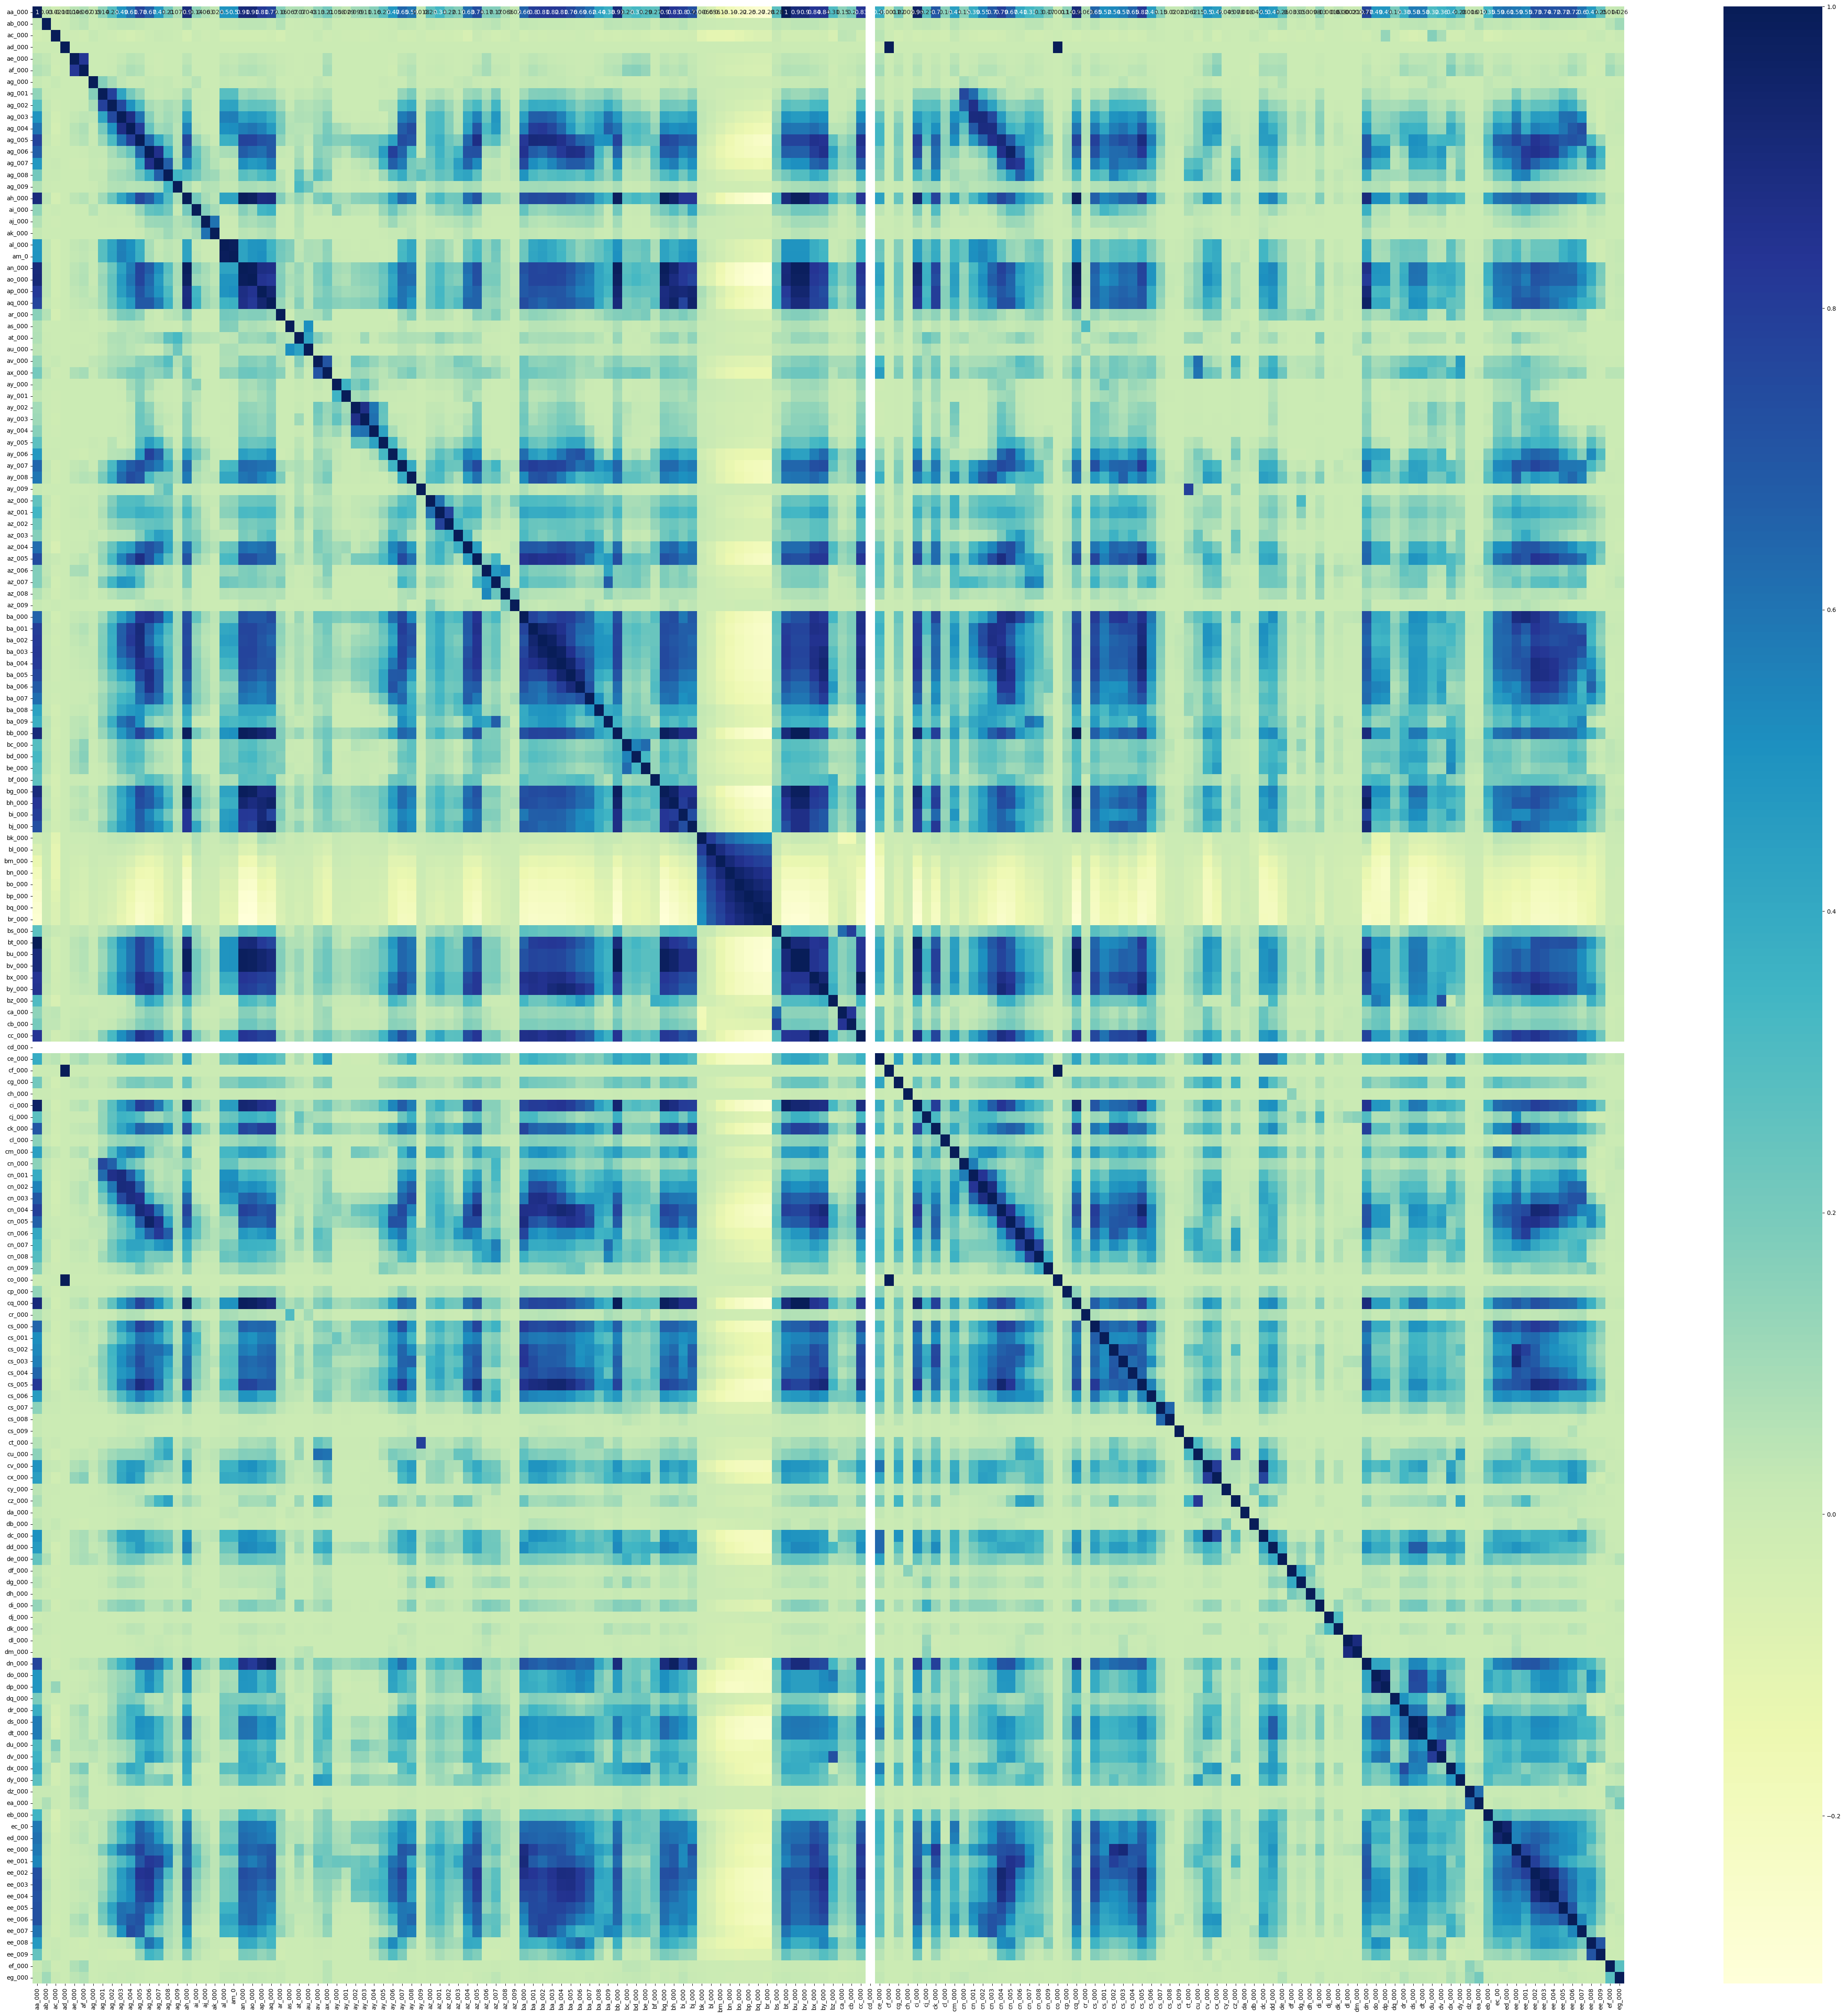

In [16]:
plt.figure(figsize=(60, 60))
corr = train_x_postimp.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

#### (iv) Make scatter plots and box plots

#### Pick |√170| features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [17]:
#pick top |root(170)| feats
no_feats=int(np.floor(np.sqrt(170)))
print(no_feats)
sorted_cv_feats=cv_all170feats.loc['coefficient of variation'].sort_values(ascending=False)
top_feats=sorted_cv_feats[0:no_feats]
top_featnames=top_feats.index
print("Features with Highest CV : ")
print(top_feats)

13
Features with Highest CV : 
cs_009    235.277605
cf_000    184.233092
co_000    183.949017
ad_000    183.847620
dh_000    114.984991
dj_000    109.647285
ag_000     91.878565
as_000     86.416904
ay_009     83.786063
az_009     76.967978
ak_000     74.526688
au_000     68.160554
ch_000     58.268229
Name: coefficient of variation, dtype: float64


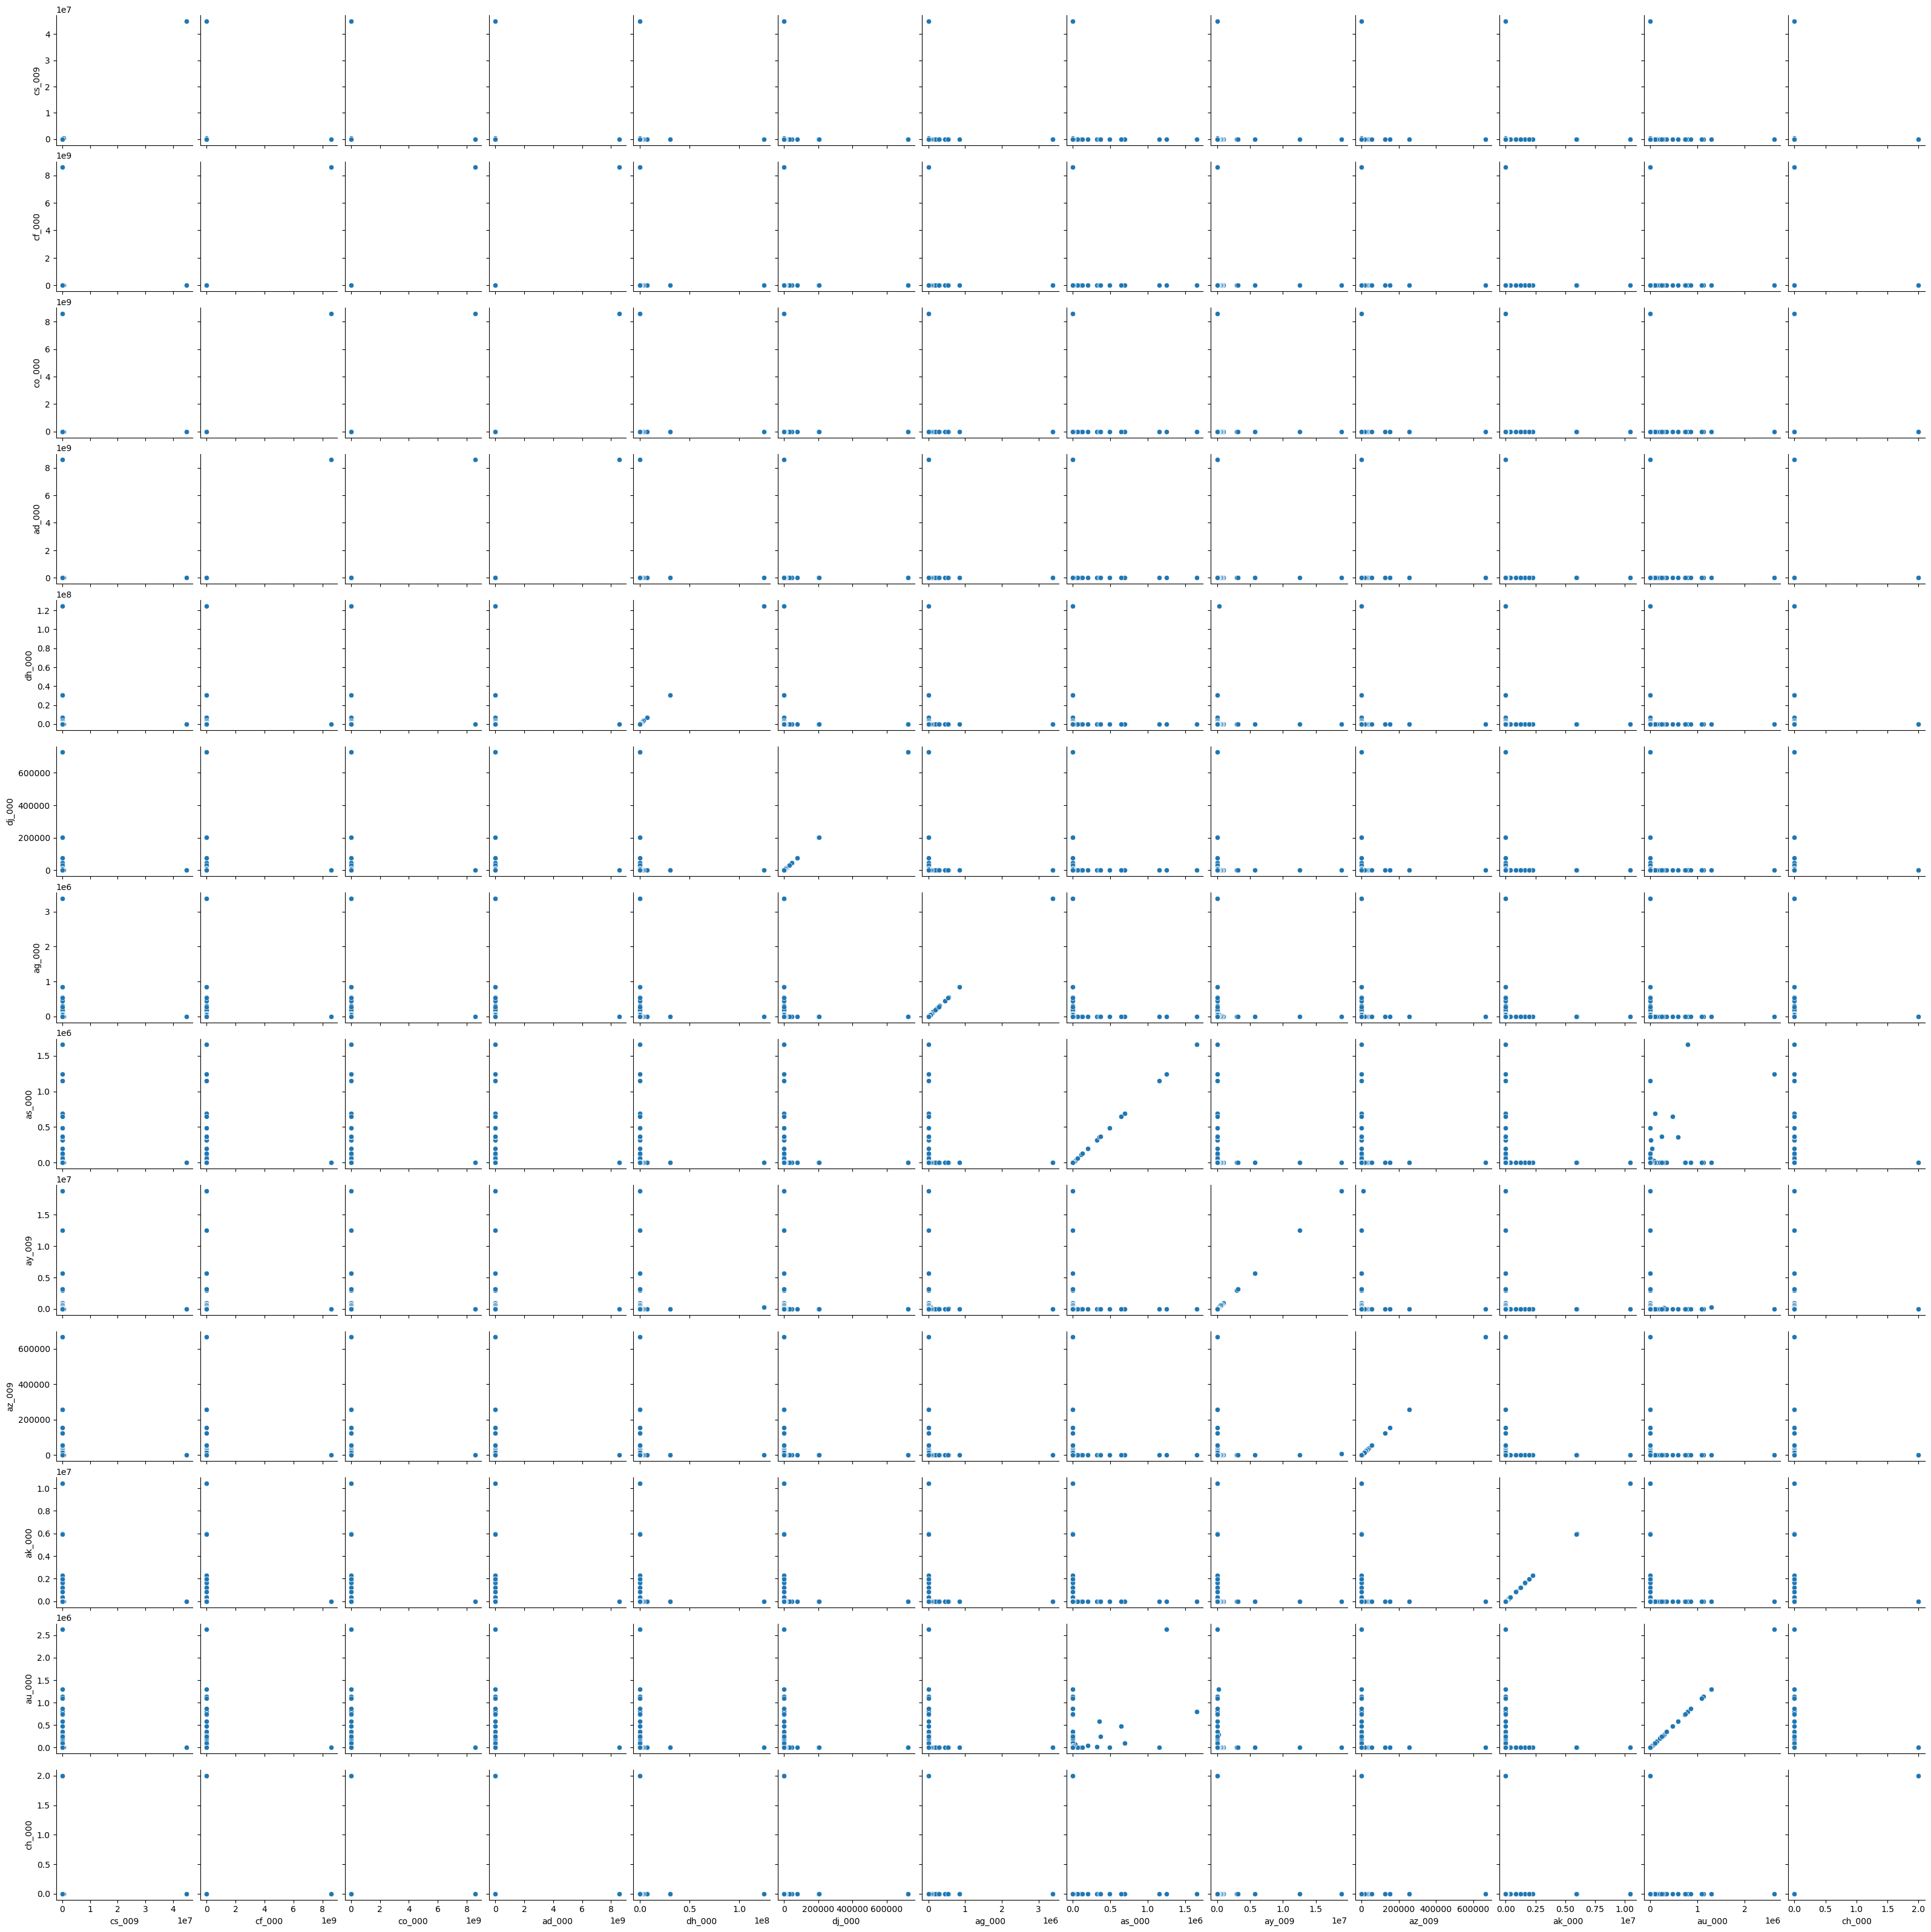

In [18]:


sns.pairplot(data = train_x_postimp[top_featnames], diag_kind = None)

[]

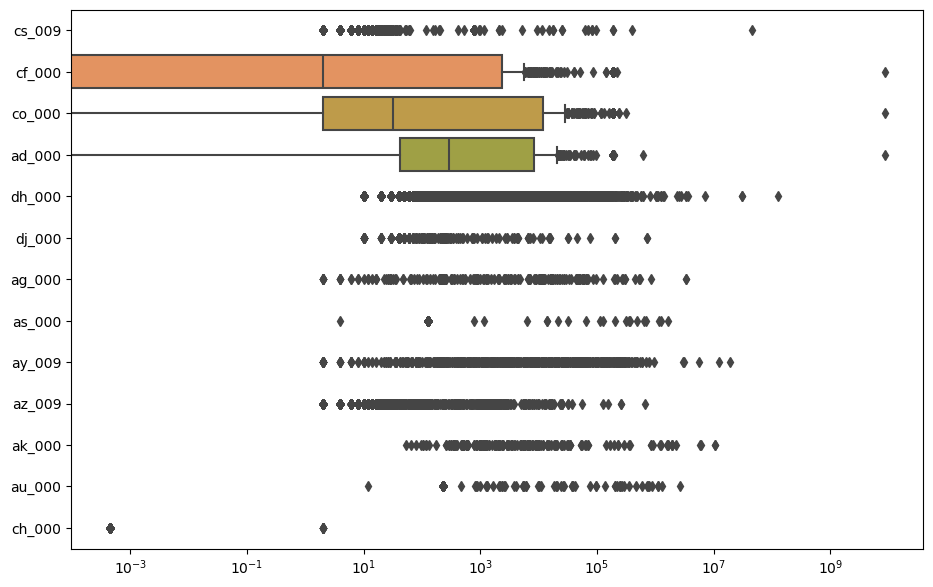

In [19]:
fig, axes = plt.subplots(figsize=(11, 7))
boxp = sns.boxplot(data=train_x_postimp[top_featnames], ax=axes, orient='h')
boxp.set(xscale="log")
plt.plot()

#### Note : repeated using all data (from both training and testing sets) 

In [20]:
cv_all170feats_full=pd.DataFrame()
cv_all170feats_full.index=['mean', 'standard deviation', 'coefficient of variation']
for c in postimpute_fulldf.columns:
    mean=postimpute_fulldf[c].mean()
    std=postimpute_fulldf[c].std()
    cv_all170feats_full[c]=[mean,std,(std/mean)]
cv_all170feats_full

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
mean,61159.759395,0.725584,3.564406e+08,1.505825e+05,6.736860,10.836109,200.419977,1204.876239,9697.876841,93651.557911,...,4.495789e+05,213247.397854,4.506510e+05,4.006248e+05,3.378721e+05,3.475620e+05,139897.549233,8425.007314,0.085187,0.219056
standard deviation,264736.613729,1.580609,7.726379e+08,3.113848e+07,150.191552,197.318616,18331.517520,50701.602011,170924.374608,819738.567890,...,1.170523e+06,548744.329568,1.183134e+06,1.145079e+06,1.091658e+06,1.697870e+06,466560.978684,48476.793675,4.082618,9.999582
coefficient of variation,4.328608,2.178397,2.167648e+00,2.067868e+02,22.293998,18.209361,91.465520,42.080340,17.624927,8.753069,...,2.603598e+00,2.573276,2.625389e+00,2.858232e+00,3.230981e+00,4.885086e+00,3.335019,5.753917,47.925135,45.648516


#### (iii) Plot a correlation matrix
#### Plot a correlation matrix for your features using pandas or any other tool.

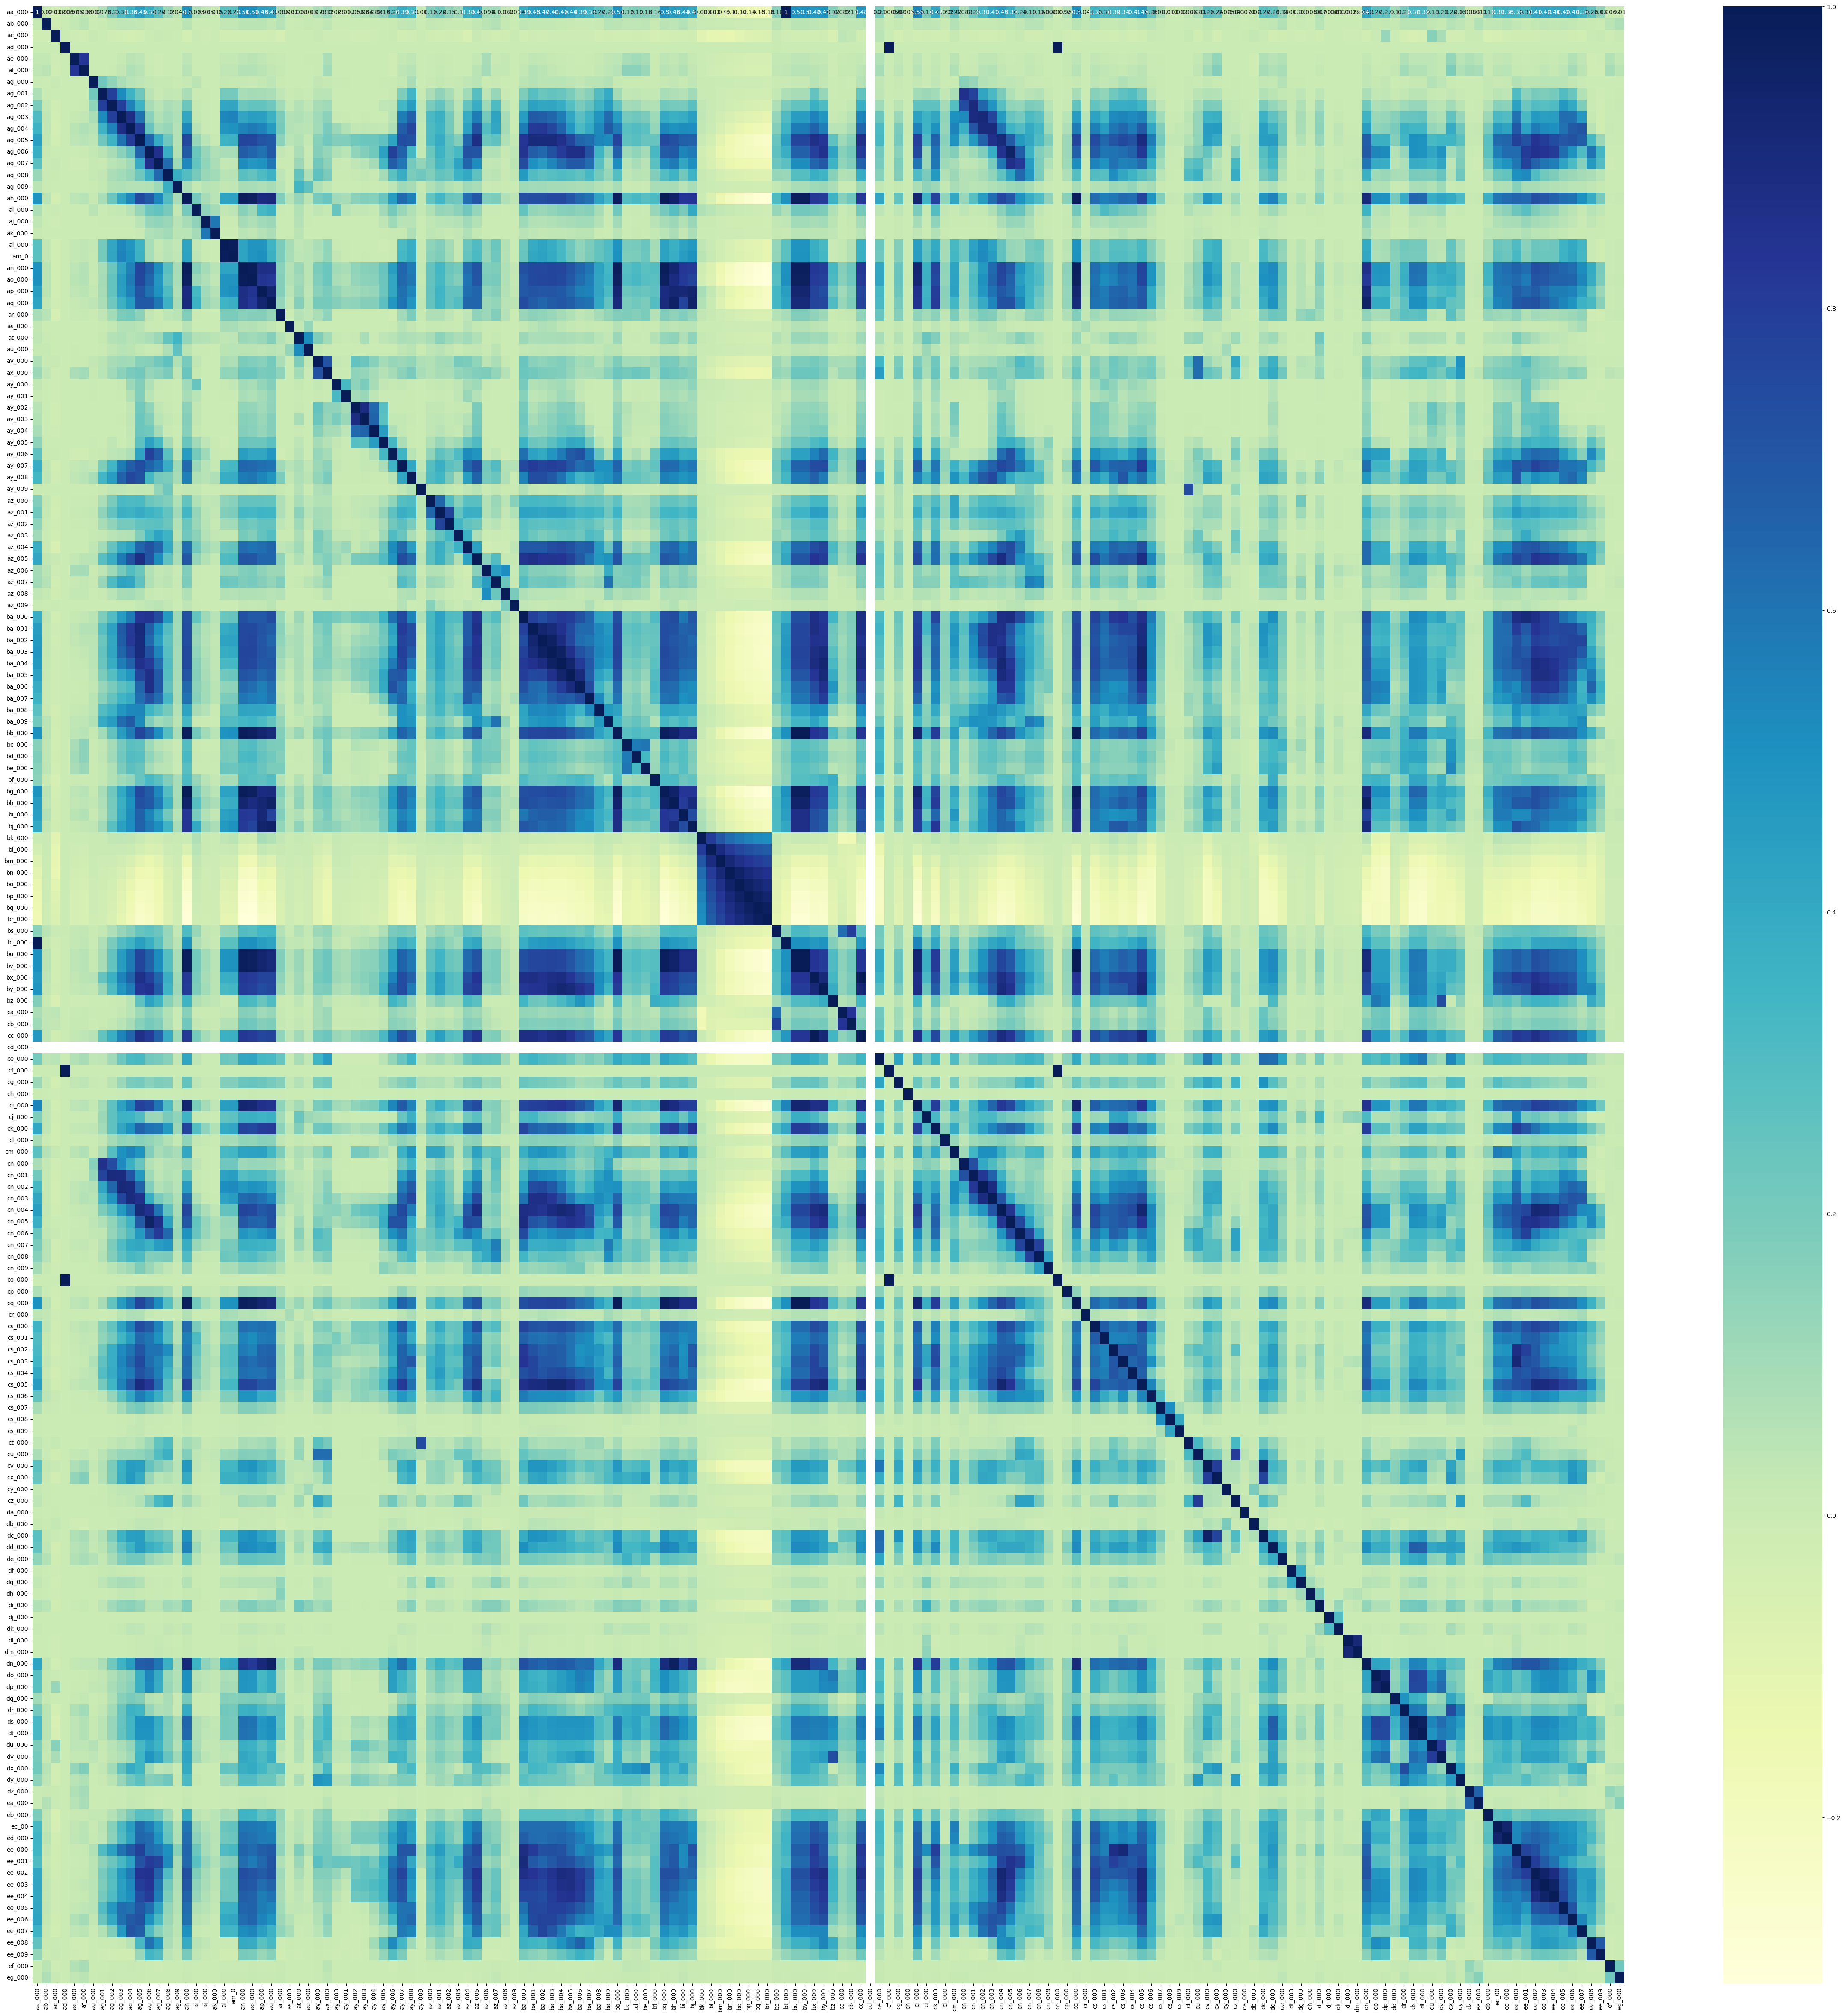

In [21]:
##correlation matrix - all data
plt.figure(figsize=(60, 60))
corr = postimpute_fulldf.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

#### (iv) Make scatter plots and box plots

#### Pick |√170| features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [22]:
#pick top |root(170)| feats
no_feats=int(np.floor(np.sqrt(170)))
print(no_feats)
sorted_cv_feats_full=cv_all170feats_full.loc['coefficient of variation'].sort_values(ascending=False)
top_feats_full=sorted_cv_feats_full[0:no_feats]
top_featnames_full=top_feats_full.index
print("Features with Highest CV : ")
print(top_feats_full)

13
Features with Highest CV : 
cf_000    207.335930
co_000    206.941549
ad_000    206.786809
cs_009    192.498194
dj_000    122.169994
as_000    113.895899
dh_000    112.666588
df_000    111.279258
ag_000     91.465520
au_000     86.090347
ak_000     78.624114
az_009     78.005605
ay_009     77.461293
Name: coefficient of variation, dtype: float64


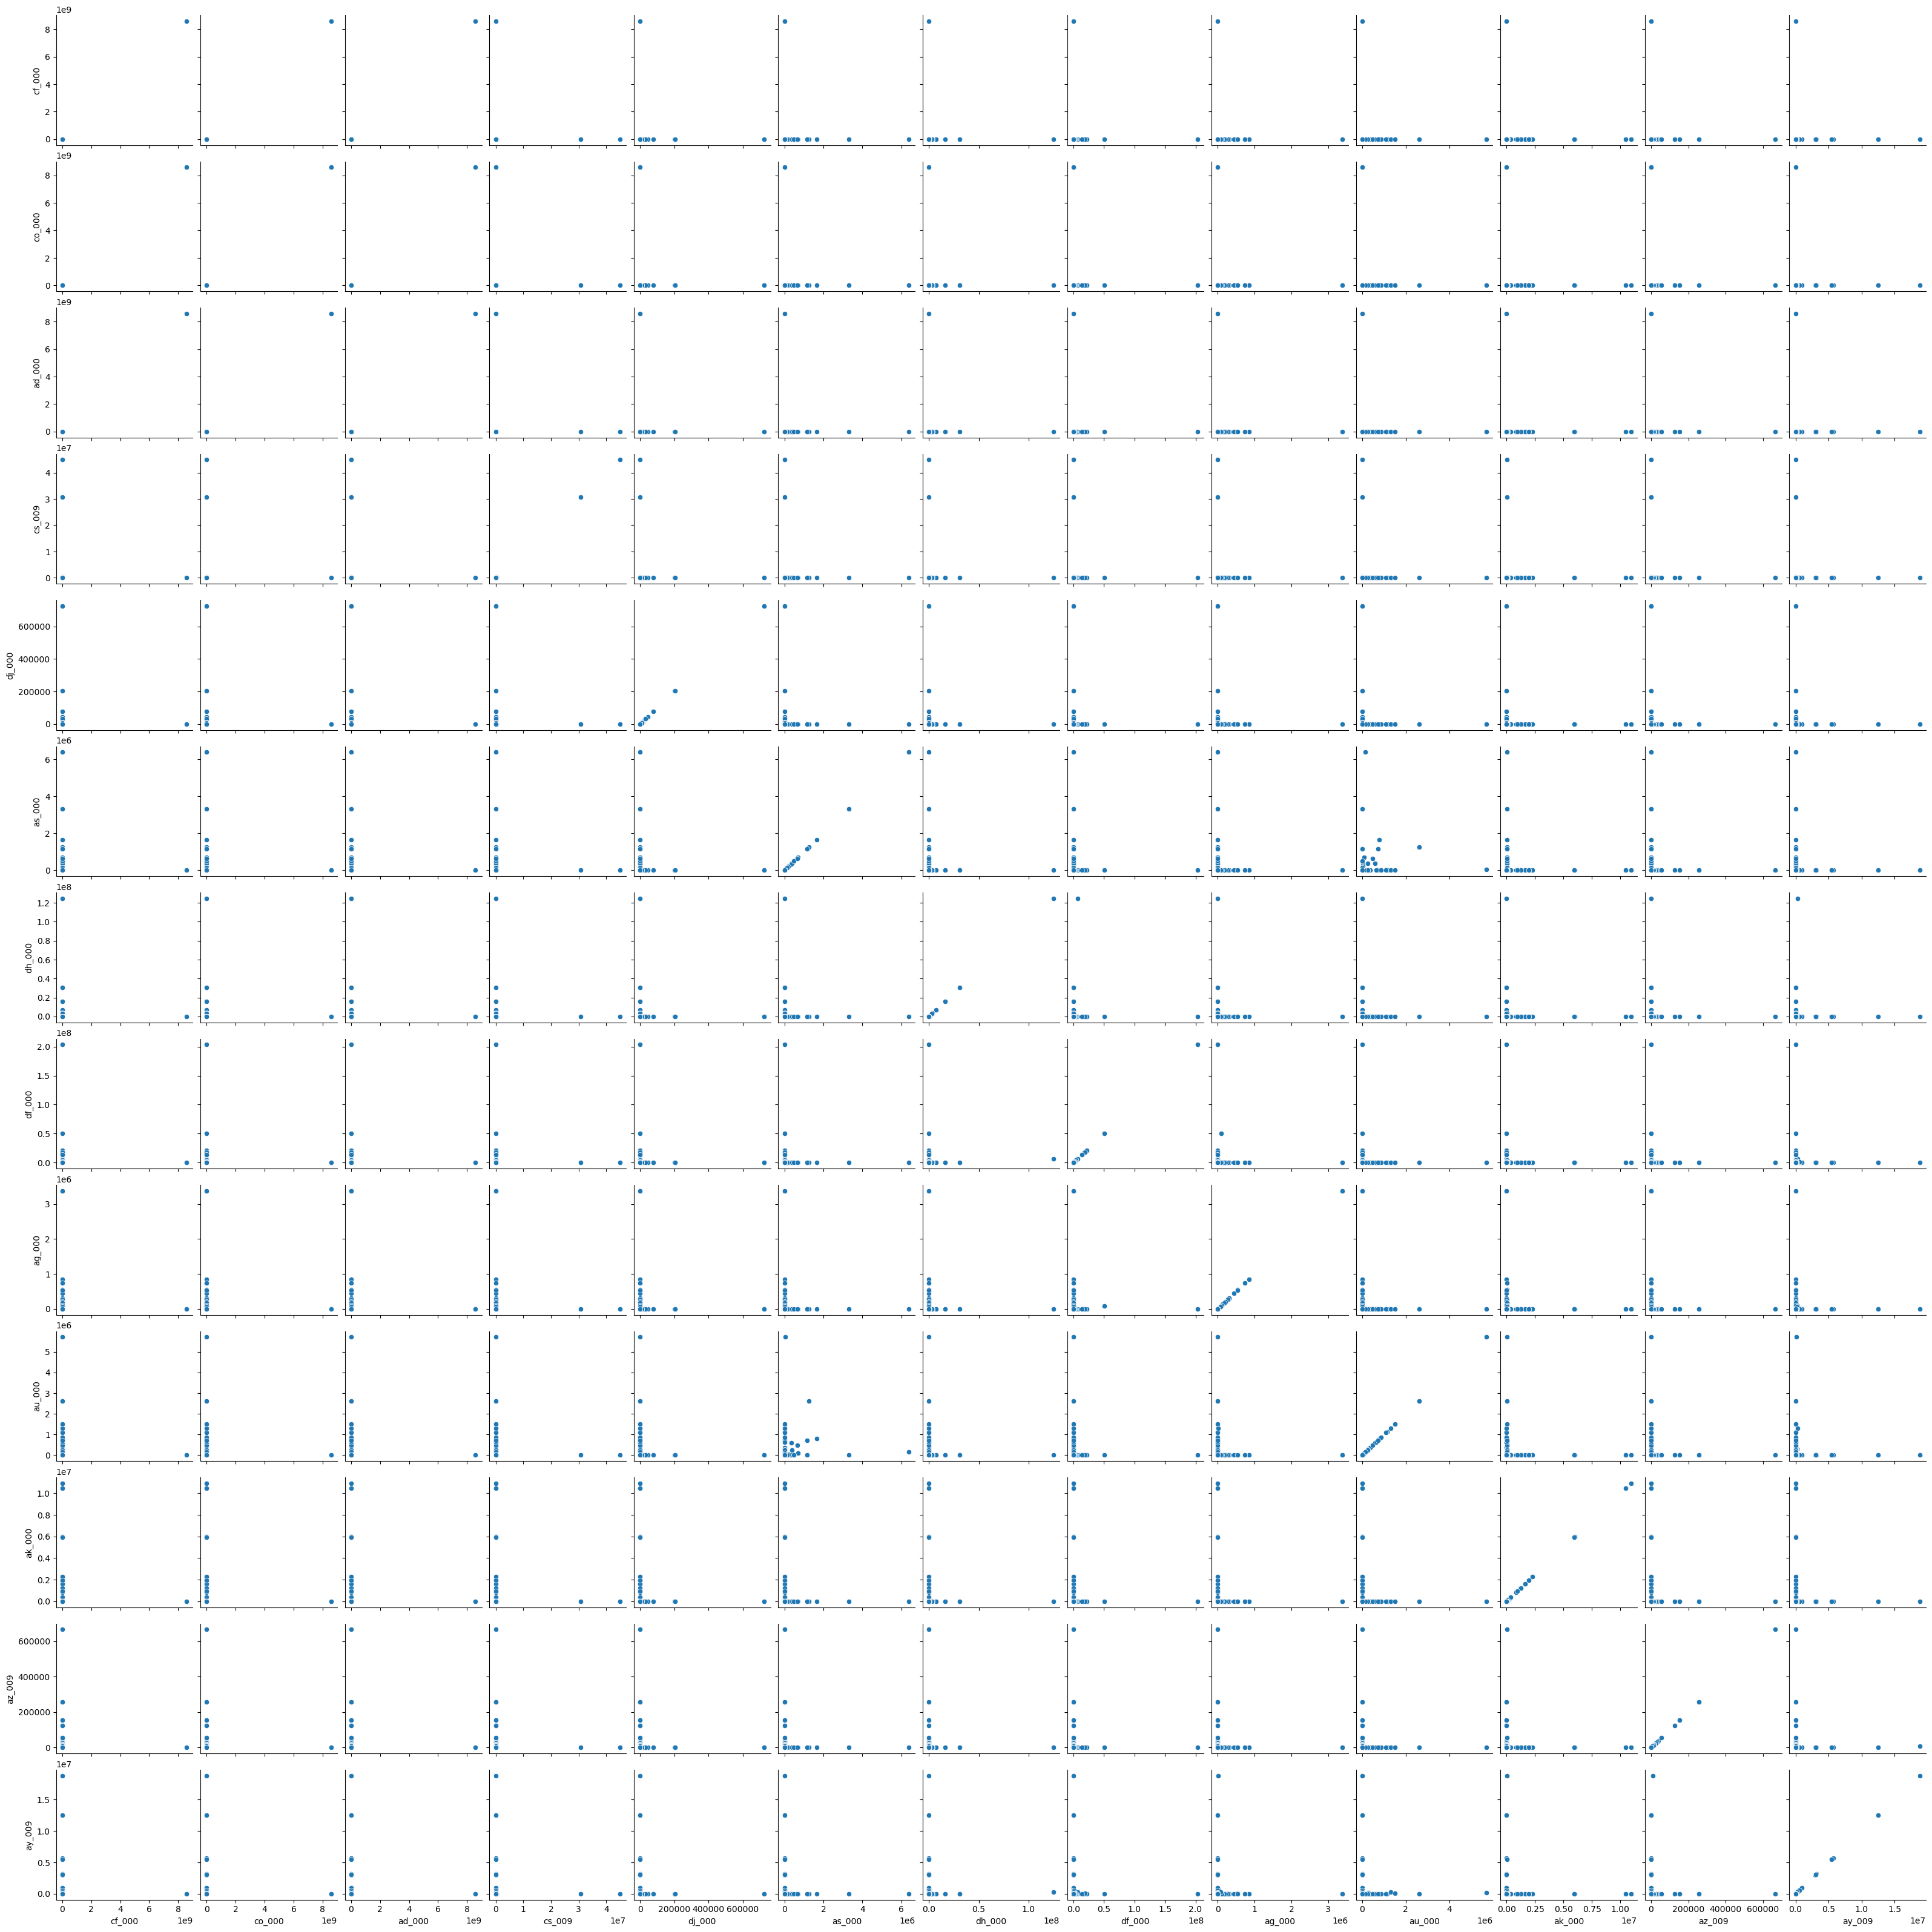

In [23]:

sns.pairplot(data = postimpute_fulldf[top_featnames_full], diag_kind = None)

[]

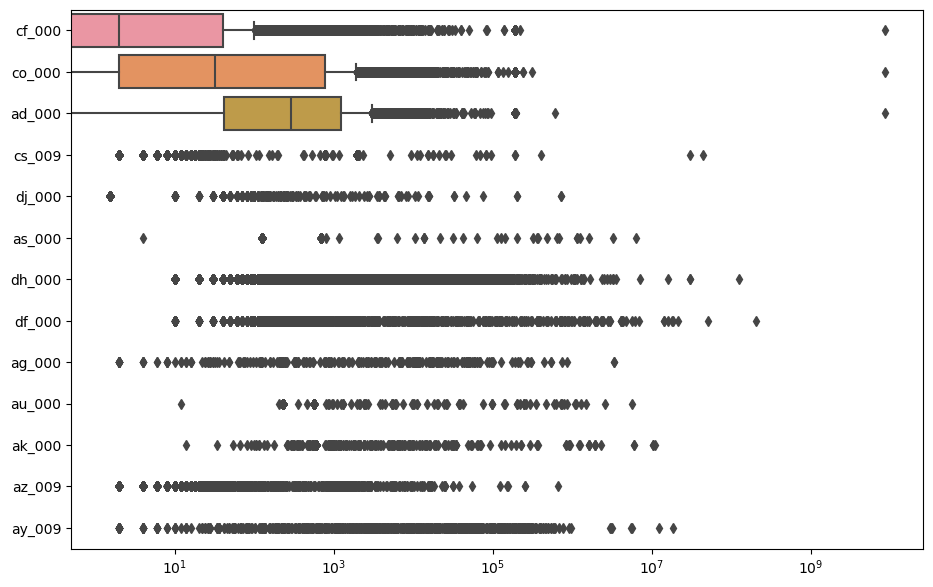

In [24]:
fig, axes = plt.subplots(figsize=(11, 7))
boxp = sns.boxplot(data=postimpute_fulldf[top_featnames_full], ax=axes, orient='h')
boxp.set(xscale="log")
plt.plot()

### Answer:
#### It can be observed that the scatterplots are completely scattered. Hence, we can't draw conclusions just based on the scatterplots alone.
#### Since the imputation is performed based on the mean, outliers can easily affect the data point

#### (v) Is this data set imbalanced?

#### Determine the number of positive and negative data. Is this data set imbalanced?

In [25]:
#count +ve and -ve in train data
train_y.value_counts()

class
neg      59000
pos       1000
Name: count, dtype: int64

In [26]:
#count +ve and -ve in test data
test_y.value_counts()

class
neg      15625
pos        375
Name: count, dtype: int64

### Yes, we can observe from the training and testing sets that the dataset is imbalanced (pos class is rare)

### (c) Train a random forest

#### Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [27]:
random_forest= RandomForestClassifier(max_depth=5, random_state=60000,oob_score=True)
random_forest.fit(train_x_postimp, train_y)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=60000)

In [28]:
train_y_pred = random_forest.predict(train_x_postimp)
train_y_predprob=random_forest.predict_proba(train_x_postimp)

In [29]:
train_acc=accuracy_score(train_y, train_y_pred)
print("Training Accuracy Score :"+str(np.round(train_acc,5)))
print("Train Error :"+str(np.round(1-train_acc,5)))

Training Accuracy Score :0.99203
Train Error :0.00797


In [30]:
print("Confusion Matrix - Training Data")
print(confusion_matrix(train_y, train_y_pred))


Confusion Matrix - Training Data
[[58972    28]
 [  450   550]]


In [31]:
def plot_roc_curve(y_true, y_predprob, xgb_flag=False):
    fig, axes = plt.subplots(figsize=(8, 7))
    y_predicted = y_predprob[:, 1]
    if not xgb_flag:
        fpr, tpr, thresholds = roc_curve(y_true, y_predicted, pos_label='pos')
    else:
        fpr, tpr, thresholds = roc_curve(y_true, y_predicted)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label=f"ROC Curve Area: {round(roc_auc, 4)}")
    axes.plot([0, 1], [0, 1], "--")
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    plt.show()

ROC for Random Forest - Training Data


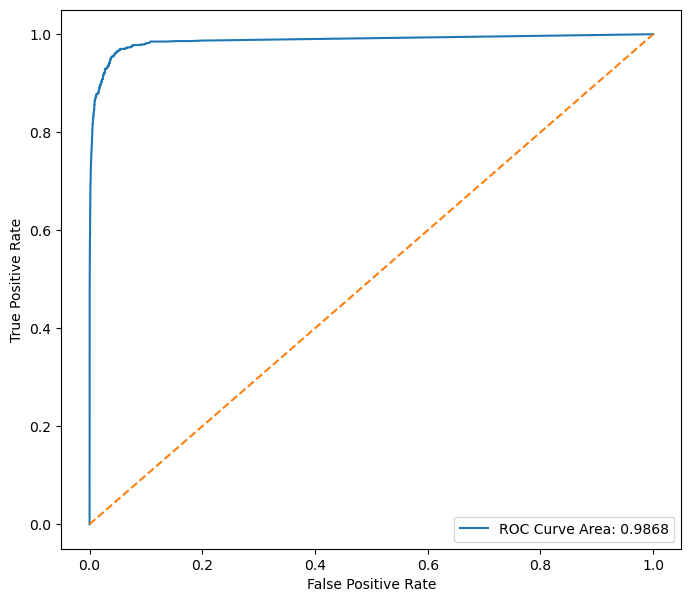

In [32]:
print("ROC for Random Forest - Training Data")
plot_roc_curve(train_y,train_y_predprob)

## Random Forest - Test Set

In [33]:
test_y_pred = random_forest.predict(test_x_postimp)
test_y_predprob=random_forest.predict_proba(test_x_postimp)

In [34]:
test_acc=accuracy_score(test_y, test_y_pred)
print("Test Accuracy Score :"+str(np.round(test_acc,5)))
print("Test Error :"+str(np.round(1-test_acc,5)))

Test Accuracy Score :0.98794
Test Error :0.01206


In [35]:
print("Confusion Matrix - Testing Data")
print(confusion_matrix(test_y, test_y_pred))

Confusion Matrix - Testing Data
[[15612    13]
 [  180   195]]


ROC for Random Forest - Testing Data


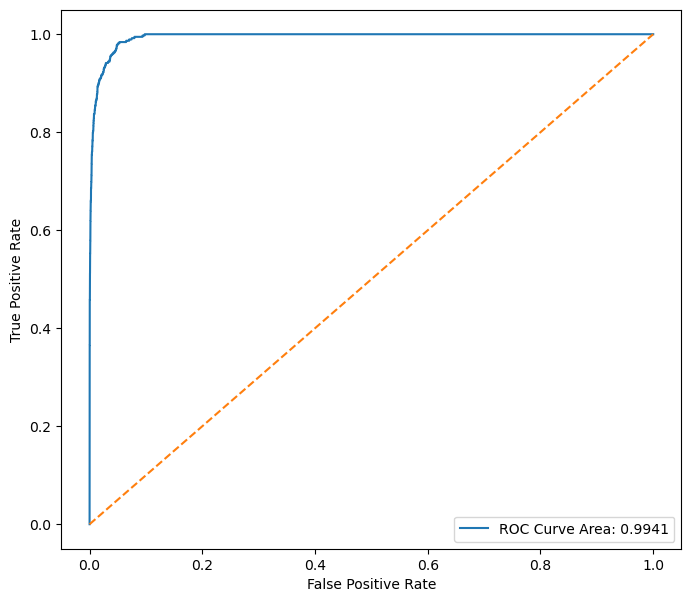

In [36]:
print("ROC for Random Forest - Testing Data")
plot_roc_curve(test_y,test_y_predprob)

In [37]:
#OutofBagError
train_oob_error = 1 - random_forest.oob_score_
print("Train Out of Bag Error: "+str(np.round(train_oob_error,5)))

Train Out of Bag Error: 0.00937


#### Train Out of Bag Error = 0.00937
#### Test Error = 0.01206

### (d) Research class imbalance in random forest

#### Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c

### class imbalance is addressed in random forests in two ways:
#### BalancedRandomForestClassifier - randomly undersamples each boostrap sample to negate imbalance effect
#### RandomForestClassifier with class_weight = 'balanced' - weights associated with classes in the form {class_label: weight}. If not included, all classes are supposed to have weight of one

### I have made use of the second method in this section

In [38]:
random_forest_balanced= RandomForestClassifier(max_depth=5, random_state=60000,class_weight='balanced',oob_score=True)
random_forest_balanced.fit(train_x_postimp, train_y)

RandomForestClassifier(class_weight='balanced', max_depth=5, oob_score=True,
                       random_state=60000)

In [39]:
train_y_pred = random_forest_balanced.predict(train_x_postimp)
train_y_predprob=random_forest_balanced.predict_proba(train_x_postimp)

In [40]:
train_acc=accuracy_score(train_y, train_y_pred)
print("Training Accuracy Score :"+str(np.round(train_acc,5)))
print("Train Error :"+str(np.round(1-train_acc,5)))

Training Accuracy Score :0.95887
Train Error :0.04113


In [41]:
print("Confusion Matrix - Training Data")
print(confusion_matrix(train_y, train_y_pred))

Confusion Matrix - Training Data
[[56563  2437]
 [   31   969]]


ROC for Random Forest - Training Data


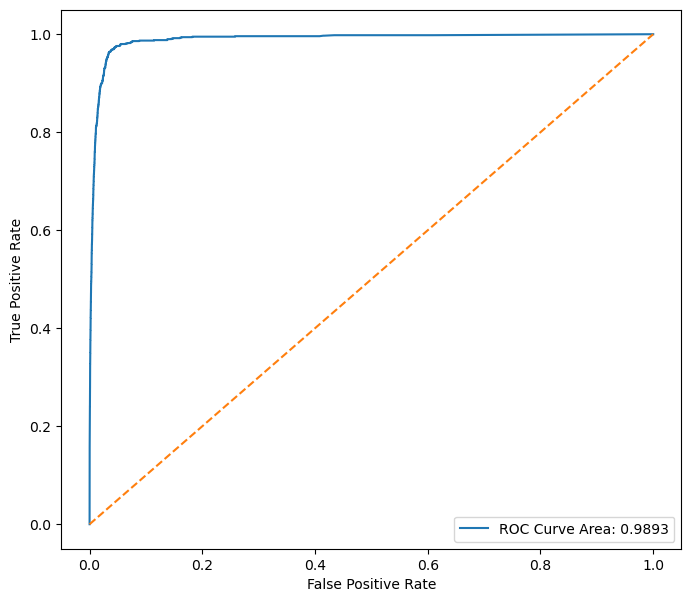

In [42]:
print("ROC for Random Forest - Training Data")
plot_roc_curve(train_y,train_y_predprob)

### Balanced Random Forest - Test Set


In [43]:
test_y_pred = random_forest_balanced.predict(test_x_postimp)
test_y_predprob=random_forest_balanced.predict_proba(test_x_postimp)

In [44]:
test_acc=accuracy_score(test_y, test_y_pred)
print("Test Accuracy Score :"+str(np.round(test_acc,5)))
print("Test Error :"+str(np.round(1-test_acc,5)))

Test Accuracy Score :0.9595
Test Error :0.0405


In [45]:
print("Confusion Matrix - Testing Data")
print(confusion_matrix(test_y, test_y_pred))

Confusion Matrix - Testing Data
[[14992   633]
 [   15   360]]


ROC for Random Forest - Testing Data


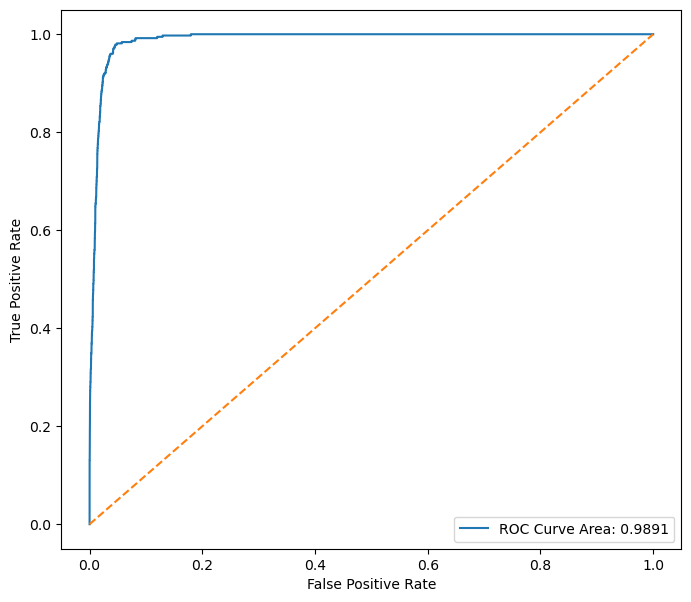

In [46]:
print("ROC for Random Forest - Testing Data")
plot_roc_curve(test_y,test_y_predprob)

In [47]:
#OutofBagError
train_oob_error = 1 - random_forest_balanced.oob_score_
print("Train Out of Bag Error: "+str(np.round(train_oob_error,5)))

Train Out of Bag Error: 0.04245


#### Train Out of Bag Error = 0.04245
#### Test Error = 0.0405

#### Comparing results of 1 (d) with 1 (c)

#### 1 (c) Class Imbalance not compensated Test Accuracy = 0.98794 
#### 1 (d) Class Imbalance compensated Test Accuracy= 0.9595

In 1(c), the model makes good predictions over the neg class which are large in number, but makes poor predictions for the pos class (correctly predicts only 195 out of 375). The higher accuracy obtained can be attributed to the presence of a huge number of neg class data points, that is the data imbalance. In 1 (d), after the class imbalance is addressed, the model makes pretty good predictions for the pos class as well (correctly predicts only 360 out of 375)

### (e) XGBoost and Model Trees

In [48]:
#scaling
scaler = StandardScaler()
train_x_scale = pd.DataFrame(scaler.fit_transform(train_x_postimp),columns=train_x_postimp.columns)
test_x_scale = pd.DataFrame(scaler.fit_transform(test_x_postimp),columns=test_x_postimp.columns)

In [49]:
xgb = XGBClassifier(objective='binary:logistic',colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5,
                          use_label_encoder=False)
param_grid = {
    "reg_alpha": [0.01, 0.05,0.07,0.08,0.09, 0.1, 0.2, 0.5, 0.75, 1, 2, 3, 4, 5, 10, 20, 50, 100, 200]
}

In [50]:
test_y['class'].replace({'neg':0, 'pos':1}, inplace = True)
train_y['class'].replace({'neg':0, 'pos':1}, inplace = True)

In [51]:
train_y

,class
0,0
1,0
2,0
3,0
4,0
...,...
59995,0
59996,0
59997,0
59998,0


In [52]:
test_y

,class
0,0
1,0
2,0
3,0
4,0
...,...
15995,0
15996,0
15997,0
15998,0


In [53]:

grid_search_cv = GridSearchCV(xgb, 
                       param_grid, 
                       n_jobs=-1, 
                       cv=KFold(n_splits=5,shuffle=True,random_state=11), 
                       scoring="accuracy")
grid_search_cv.fit(train_x_scale, train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.3, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     inte...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'reg_alpha': [0.01, 0.05, 0.07, 0.08, 0.09, 0.1, 0.2,
                                       0.5, 0.75, 1, 2, 3, 4, 5, 10, 20, 50,
                                       100, 200]},
             scoring='accuracy')

In [54]:
best_alpha=grid_search_cv.best_params_['reg_alpha']
corres_acc=np.round(grid_search_cv.best_score_,5)
print("Best Alpha : "+str(best_alpha))
print("Corresponding cross-validation accuracy : "+str(corres_acc))

Best Alpha : 0.2
Corresponding cross-validation accuracy : 0.99427


In [55]:
xgb_selalpha = XGBClassifier(objective='binary:logistic',
                          reg_alpha=best_alpha,
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5,
                          use_label_encoder=False,)
xgb_selalpha.fit(train_x_scale, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
train_y_pred = xgb_selalpha.predict(train_x_scale)
train_y_predprob=xgb_selalpha.predict_proba(train_x_scale)

In [57]:
train_acc=accuracy_score(train_y, train_y_pred)
print("Training Accuracy Score :"+str(np.round(train_acc,5)))
print("Train Error :"+str(np.round(1-train_acc,5)))

Training Accuracy Score :0.99823
Train Error :0.00177


In [58]:
print("Confusion Matrix - Training Data")
print(confusion_matrix(train_y, train_y_pred))

Confusion Matrix - Training Data
[[58993     7]
 [   99   901]]


In [59]:
#ROC AUC Score
train_roc_score=roc_auc_score(train_y, train_y_pred)
print("ROC Score - Train Data : "+str(train_roc_score))

ROC Score - Train Data : 0.9504406779661017


ROC for XGB Classifier - Training Data


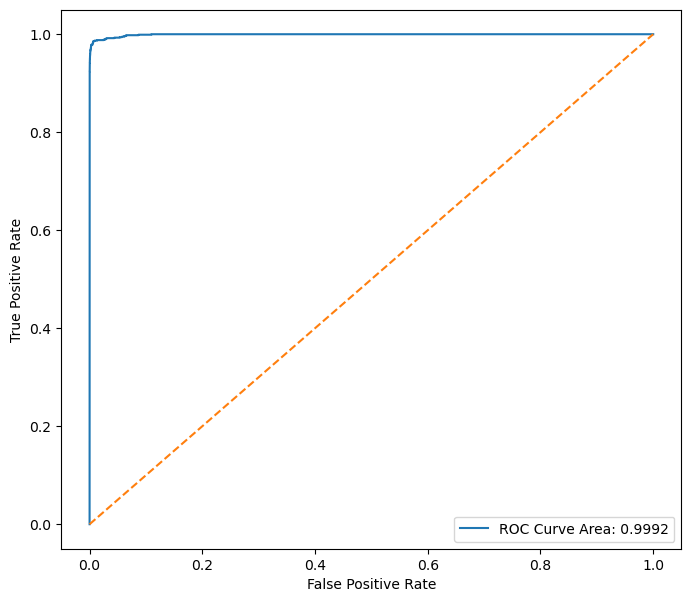

In [60]:
print("ROC for XGB Classifier - Training Data")
plot_roc_curve(train_y,train_y_predprob,xgb_flag=True)

### XGB - Test Set

In [61]:
test_y_pred = xgb_selalpha.predict(test_x_scale)
test_y_predprob=xgb_selalpha.predict_proba(test_x_scale)

In [62]:
test_acc=accuracy_score(test_y, test_y_pred)
print("Test Accuracy Score :"+str(np.round(test_acc,5)))
print("Test Error :"+str(np.round(1-test_acc,5)))

Test Accuracy Score :0.99244
Test Error :0.00756


In [63]:
print("Confusion Matrix - Testing Data")
print(confusion_matrix(test_y, test_y_pred))

Confusion Matrix - Testing Data
[[15599    26]
 [   95   280]]


In [64]:
#ROC AUC Score
test_roc_score=roc_auc_score(test_y, test_y_pred)
print("ROC Score - Test Data : "+str(test_roc_score))

ROC Score - Test Data : 0.8725013333333332


ROC for XGB Classifier - Testing Data


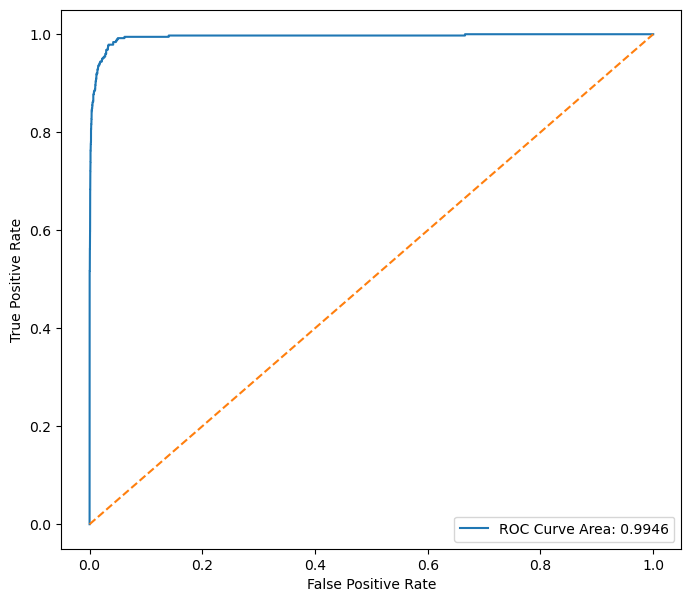

In [65]:
print("ROC for XGB Classifier - Testing Data")
plot_roc_curve(test_y,test_y_predprob,xgb_flag=True)

### (f) Use SMOTE to pre-process your data

In [66]:
smote = SMOTE()
train_x_smote, train_y_smote = smote.fit_resample(train_x_scale, train_y)

In [67]:
print("Before SMOTE")
print(train_y.value_counts())
    
print("After SMOTE")
print(train_y_smote.value_counts())

Before SMOTE
class
0        59000
1         1000
Name: count, dtype: int64
After SMOTE
class
0        59000
1        59000
Name: count, dtype: int64


In [68]:
from imblearn.pipeline import Pipeline as imbpipeline
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', xgb]])
grid = {'classifier__reg_alpha':[0.01, 0.05,0.07,0.08,0.09, 0.1, 0.2, 0.5, 0.75, 1, 2, 3, 4, 5, 10, 20, 50, 100, 200]}
    
grid_search_crct = GridSearchCV(estimator=pipeline,
                           param_grid=grid,
                           scoring='accuracy',
                           cv=KFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11),
                           n_jobs=-1)

grid_search_crct.fit(train_x_postimp, train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=True),
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=11)],
                                       ['scaler', StandardScaler()],
                                       ['classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=0.3,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=Fals...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=5,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...)]]),
             n_jobs=-1,
             param_grid={'classifier__reg_alpha': [0.01, 0.05, 0.07, 0.08, 0.09,
                                                   0.1, 0.2, 0.5, 0.75, 1, 2, 3,
                                                   4, 5, 10, 20, 50, 100,
                                                   200]},
             scoring='accuracy')

In [69]:
smote_best_alpha=grid_search_crct.best_params_['classifier__reg_alpha']
smote_corres_score=np.round(grid_search_crct.best_score_,5)
print("Best Alpha : "+str(smote_best_alpha))
print("Corresponding cross-validation accuracy : "+str(smote_corres_score))

Best Alpha : 0.1
Corresponding cross-validation accuracy : 0.98935


In [70]:
xgb_smote_selalpha = XGBClassifier(objective='binary:logistic',
                          reg_alpha=smote_best_alpha,
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5,
                          use_label_encoder=False,)
xgb_smote_selalpha.fit(train_x_smote, train_y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
train_y_pred = xgb_smote_selalpha.predict(train_x_scale)
train_y_predprob=xgb_smote_selalpha.predict_proba(train_x_scale)

In [72]:
train_acc=accuracy_score(train_y, train_y_pred)
print("Training Accuracy Score :"+str(np.round(train_acc,5)))
print("Train Error :"+str(np.round(1-train_acc,5)))

Training Accuracy Score :0.99275
Train Error :0.00725


In [73]:
print("Confusion Matrix - Training Data")
print(confusion_matrix(train_y, train_y_pred))

Confusion Matrix - Training Data
[[58612   388]
 [   47   953]]


In [74]:
#ROC AUC Score
train_roc_score=roc_auc_score(train_y, train_y_pred)
print("ROC Score - Train Data : "+str(train_roc_score))

ROC Score - Train Data : 0.9732118644067796


ROC for XGB Classifier- SMOTE - Training Data


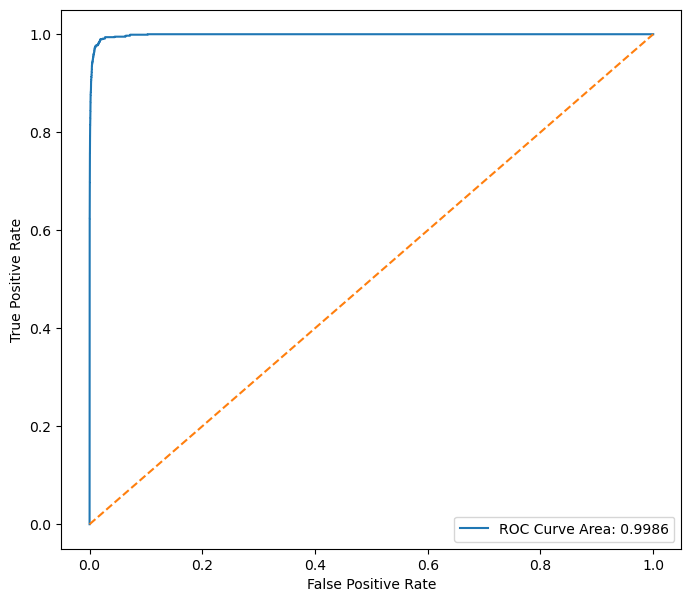

In [75]:
print("ROC for XGB Classifier- SMOTE - Training Data")
plot_roc_curve(train_y,train_y_predprob,xgb_flag=True)

### XGB - SMOTE - Testing Set

In [76]:
test_y_pred = xgb_smote_selalpha.predict(test_x_scale)
test_y_predprob=xgb_smote_selalpha.predict_proba(test_x_scale)

In [77]:
test_acc=accuracy_score(test_y, test_y_pred)
print("Test Accuracy Score :"+str(np.round(test_acc,5)))
print("Test Error :"+str(np.round(1-test_acc,5)))

Test Accuracy Score :0.70981
Test Error :0.29019


In [78]:
print("Confusion Matrix - Testing Data")
print(confusion_matrix(test_y, test_y_pred))

Confusion Matrix - Testing Data
[[10983  4642]
 [    1   374]]


In [79]:
#ROC AUC Score
test_roc_score=roc_auc_score(test_y, test_y_pred)
print("ROC Score - Test Data : "+str(test_roc_score))

ROC Score - Test Data : 0.8501226666666666


ROC for XGB Classifier - Testing Data


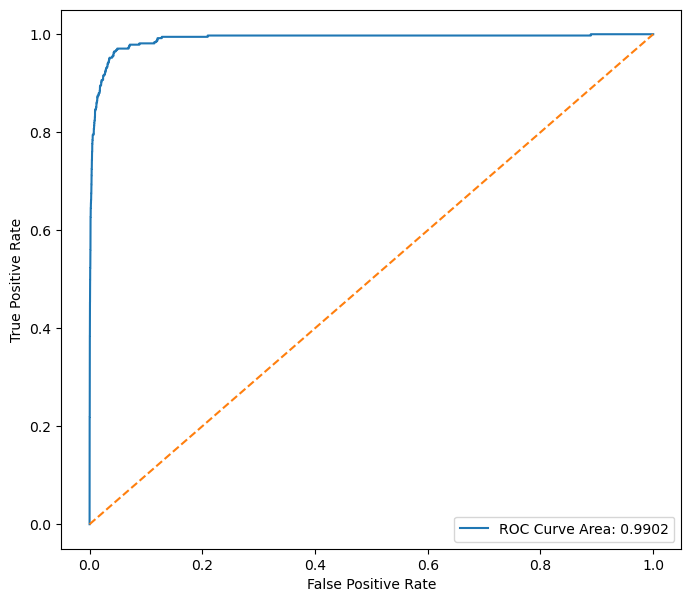

In [80]:
print("ROC for XGB Classifier - Testing Data")
plot_roc_curve(test_y,test_y_predprob,xgb_flag=True)

#### After using SMOTE to compensate the class imbalance, we observe that the SMOTE case gives a lower test accuracy than the uncompensated case (1 (e)). However, after using SMOTE, the model understands the pos class and correctly predicts greater number of pos class datapoints than the model in 1(e).

## 2. ISLR 6.6.3

### Suppose we estimate the regression coefficients in a linear regression model by minimizing for a particular value of s. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer

### i. Increase initially, and then eventually start decreasing in an inverted U shape.

### ii. Decrease initially, and then eventually start increasing in a U shape.


### iii. Steadily increase.

### iv. Steadily decrease.

### v. Remain constant.

### (a) As we increase s from 0, the training RSS will


### Answer : iv. Steadily decrease

#### As we increase s from 0, the estimated coefficients go from 0 to their OLS value (the constraint on them is getting more relaxed). Therefore, the training RSS will steadily decrease

### (b) Repeat (a) for test RSS.

### Answer : ii. Decrease initially, and then eventually start increasing in a U shape.

#### As we increase s from 0, the constraint on the estimated coefficients gets more relaxed and the model flexibilty improves. As a result, the test RSS decreases until an inflection point is reached where the model starts to overfit. From here, the test RSS starts to increase.


### (c) Repeat (a) for variance.

### Answer :  iii. Steadily increase

#### $\beta$  is nearly zero in the beginning and hence, there's almost no variance initially. As s increases, the constraint on estimated coeffiecients gets more relaxed and the shrinkage also reduces. Hence, model flexibility increases. The variance also increases as we increase s from 0.

### (d) Repeat (a) for (squared) bias.

### Answer : iv. Steadily decrease

#### Due to the bias-variance tradeoff, as variance increases, bias will decrease. Hence, (squared) bias decreases as we increase s from 0.

### (e) Repeat (a) for the irreducible error.

### Answer : v. remain constant

#### Irreducible error is caused by the inherent uncertainty in the machine learning model and is considered an act of god. It is unaffected by increase in model flexibility. Hence, irreducible error remains constant as we increase the value of s.

## 3. ISLR 6.6.5

### It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting. Suppose that n = 2, p = 2, x11 = x12, x21 = x22. Furthermore, suppose that y1 +y2 = 0 and x11 +x21 = 0 and x12 +x22 = 0, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: βˆ0 = 0.


### (a) Write out the ridge regression optimization problem in this setting


### Answer : For ridge regression, we have

$
X =
  \begin{bmatrix}
    x_{11} x_{12} \\
    x_{21} x_{22}
  \end{bmatrix}
$

Given n=2, p=2, $x_{11} = x_{12}  , x_{21} = x_{22}, y_{1}+y_{2}=0, x_{11} + x_{21} = 0 , x_{12} + x_{22} = 0 , \hat{\beta_0} = 0$. Therefore,

$
X =
  \begin{bmatrix}
    x_{11} x_{11} \\
    x_{22} x_{22}
  \end{bmatrix}
$

ridge coeficient estimates are values that need to minimize, 

$\sum_{1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p}\beta_jx_{ij})^2 + \lambda \sum_{j=1}^{p}\beta_j^2$

For each $\lambda$ value, ridge regression aims to select $\hat{\beta_1} , $\hat{\beta_2} such that they minimize

$\sum_{1}^{2} (y_i - \beta_0 - \sum_{j=1}^{2}\beta_jx_{ij})^2 + \lambda \sum_{j=1}^{2}\beta_j^2$

$ = (y_1 - \beta_0 - \beta_1x_{11} - \beta_2x_{12})^2 + (y_2 - \beta_0 - \beta_1x_{21} - \beta_2x_{22})^2 + \lambda(\beta_1^2 + \beta_2^2)$, 

We know that $x_{11} = x_{12} $ and $x_{21} = x_{22}$ and $\hat{\beta_0} = 0 $ ,
$  (y_1  - \beta_1x_{11} - \beta_2x_{11})^2 + (y_2  - \beta_1x_{22} - \beta_2x_{22})^2 + \lambda(\beta_1^2 + \beta_2^2)$


### (b) Argue that in this setting, the ridge coefficient estimates satisfy βˆ1 = βˆ2.

### Answer : 

$f(\hat{\beta_1}, \hat{\beta_2}) = (y_1 - x_{11} ( \hat{\beta_1} + \hat{\beta_2}))^2 + (y_2 - x_{22}( \hat{\beta_1} + \hat{\beta_2}))^2 + \lambda(\hat{\beta_1}^2 + \hat{\beta_2}^2)$

$  (y_1  - \hat{\beta_1}x_{11} - \hat{\beta_2}x_{11})^2 + (y_2  - \hat{\beta_1}x_{22} - \hat{\beta_2}x_{22})^2 + \lambda(\hat{\beta_1}^2 + \hat{\beta_2}^2)$

Since $x_{11} = - x_{22}, y_{1}= - y_{2} $, 

$  (y_1  - \hat{\beta_1}x_{11} - \hat{\beta_2}x_{11})^2 + (-y_1  - \hat{\beta_1}(-x_{11}) - \hat{\beta_2}(-x_{11}))^2 + \lambda(\hat{\beta_1}^2 + \hat{\beta_2}^2)$

= $ 2 (y_1  - \hat{\beta_1}x_{11} - \hat{\beta_2}x_{11})^2 + \lambda(\hat{\beta_1}^2 + \hat{\beta_2}^2)$ 



Minimizing the equation be taking partial derivative wrt $\hat{\beta_1}$ and equating to 0, 

$\frac{{\partial f(\hat{\beta_1}, \hat{\beta_2})}}{{\partial \hat{\beta_1}}} = 0$


We get 


$4\hat{\beta_1}x_{11}^2 - 4y_1x_{11} + 4x_{11}^2\hat{\beta_2} + 2\lambda\hat{\beta_1} = 0$

$\hat{\beta_1}[4x_{11}^2 + 2\lambda] - 4y_1x_{11} + 4x_{11}^2\hat{\beta_2} = 0$

$\hat{\beta_1}[2x_{11}^2 + \lambda] - 2y_1x_{11} + 2x_{11}^2\hat{\beta_2} = 0$

Hence, 

$\hat{\beta_1} = \frac{2y_1x_{11} - 2x_{11}^2\hat{\beta_2}}{\lambda + 2x_{11}^2}$

Similarly minimizing the equation be taking partial derivative wrt $\hat{\beta_2}$ and equating to 0, 

$\frac{{\partial f(\hat{\beta_1}, \hat{\beta_2})}}{{\partial \hat{\beta_2}}} = 0$


We get 

$4\hat{\beta_1}x_{11}^2 - 4y_1x_{11} + 4x_{11}^2\hat{\beta_2} + 2\lambda\hat{\beta_2} = 0$


$\hat{\beta_2} = \frac{2y_1x_{11} - 2x_{11}^2\hat{\beta_1}}{\lambda + 2x_{11}^2}$

Since $x_{11}, y_{1} and \lambda$ are just numbers, we can take C= $\frac{2y_1x_{11}}{\lambda + 2x_{11}^2}$

and $K=\frac{ - 2x_{11}^2\hat{\beta_1}}{\lambda + 2x_{11}^2}$

to get 
$\hat{\beta_1} = C + K \hat{\beta_2}$ and 
$\hat{\beta_2} = C + K \hat{\beta_1}$

By substituting second equation in first and simplifying, we can obtain that:

$\hat{\beta_1} = \frac{C(1+K)}{(1 - K^2)}$

By substituting first equation in second and simplifying, we can obtain that:

$\hat{\beta_2} = \frac{C(1+K)}{(1 - K^2)}$


Thus, $\hat{\beta_1} = \hat{\beta_2}$

### (c) Write out the lasso optimization problem in this setting.

### Answer : 
For each $\lambda$ value, lasso regression aims to select $\hat{\beta_1} , \hat{\beta_2}$ such that they minimize

$\sum_{1}^{2} (y_i - \beta_0 - \sum_{j=1}^{2}\beta_jx_{ij})^2 + \lambda \sum_{j=1}^{2}|\beta_j|$

Using the same steps that we used in section (a) and (b) to simplify, we ultimately obtain

$2(y_1 - \hat{\beta_1}x_{11} - \hat{\beta_2}x_{11})^2 + \lambda(\left|\hat{\beta_1}\right| + \left|{\hat{\beta_2}}\right|)$

### (d) Argue that in this setting, the lasso coefficients βˆ1 and βˆ2 are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.

### Answer : To minimize the above equation, taking derivate again as shown in part (b), 

$\frac{{\partial f}}{{\partial \hat{\beta}}}$ = 0 , taking partial derivative

$4x_{11}[y_1 - x_{11}(\hat{\beta_1} + \hat{\beta_2})] = \pm \lambda$

The RHS sign depends on the value of the estimated coefficients. This is the optimization problem in LASSO and can have many possible solutions. 

The Lasso coefficients must minmimize $2(y_1 - x_{11}(\hat{\beta_1} + \hat{\beta_2}))^2 >=0$ subject to $\left|\hat{\beta_1}\right| + \left|{\hat{\beta_2}}\right|<=s$

We know that minimum RSS is zero, hence we can say that $(\hat{\beta_1},\hat{\beta_2})$ satisfy $\hat{\beta_1}+\hat{\beta_2}=\frac{y_1}{x_{11}}$ for 0 RSS

We also need to consider the lasso constraint as solutions to the optimization problem occur where the contours of $2(y_1 - x_{11}(\hat{\beta_1} + \hat{\beta_2}))^2$ touch $\left|\hat{\beta_1}\right| + \left|{\hat{\beta_2}}\right|<=s$ (lasso diamond)

As the coefficients vary along the line $\hat{\beta_1}= -\hat{\beta_2}+\frac{y_1}{x_{11}}$, the contour touches the lasso diamond at multiple points.

Hence, we can say that the lasso coefficients are not unique.

## 4. ISLR 8.4.5

### Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X): 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.
### There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches

### Majority Voting Approach 

### Answer : When the overall probability is greater than or equal to 0.5, the classification will be true. Otherwise, the classification will be false. In the given 10 samples, 6 have probabilty >= 0.5 while 4 have probability <0.5 (that is, True = 6, False = 4). Since, true class is larger in number, based on majority voting approach, the final classification would be the red class

### Average Probability Approach

### Answer : The average of the given 10 probabilities is (0.1+0.15+ 0.2+ 0.2+0.55+ 0.6+ 0.6+0.65+ 0.7+0.75) / 10 = 4.5/10 = 0.45. Based on the average probabilty approach, the final classification would be the green class



## 5. ISLR 9.7.3

### Here we explore the maximal margin classifier on a toy data set.


### (a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label.
#### Obs. X1 X2 Y
#### 1 3 4 Red
#### 2 2 2 Red
#### 3 4 4 Red
#### 4 1 4 Red
#### 5 2 1 Blue
#### 6 4 3 Blue
#### 7 4 1 Blue
### Sketch the observations.

In [81]:
toy_data = pd.DataFrame({'X1': [3, 2, 4, 1, 2, 4, 4], 
                   'X2':[4, 2, 4, 4, 1, 3, 1], 
                   'Y':['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']})
trainx=toy_data.iloc[:,0:2]
trainy=toy_data.iloc[:,2:]
trainx

,X1,X2
0,3,4
1,2,2
2,4,4
3,1,4
4,2,1
5,4,3
6,4,1


In [82]:
trainy

,Y
0,red
1,red
2,red
3,red
4,blue
5,blue
6,blue


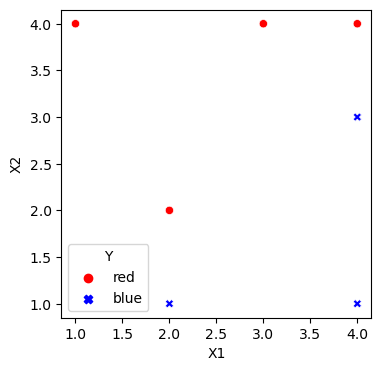

In [83]:
plt.figure(figsize=(4, 4))
scatterplot = sns.scatterplot(x="X1", y="X2", hue="Y", style="Y", data=toy_data, palette={"red": "red", "blue": "blue"})
plt.show()

In [84]:
trainy = toy_data['Y'].map({"red": 0, "blue": 1})
trainy

0    0
1    0
2    0
3    0
4    1
5    1
6    1
Name: Y, dtype: int64

### (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1))



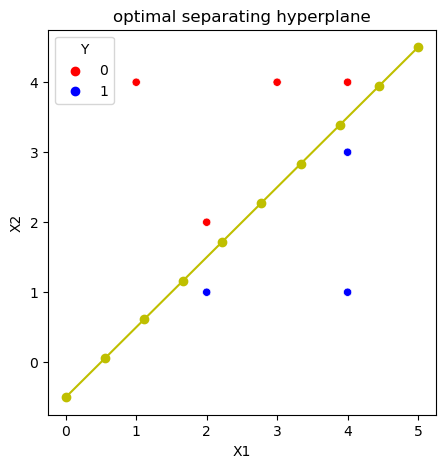

In [85]:
trainx=trainx.values
svm = SVC(kernel='linear').fit(trainx, trainy)
x = np.linspace(trainx[:, 0].min() - 1, trainx[:, 0].max() + 1, 10)
y_plane = x - 0.5

plt.figure(figsize=(5,5))
sns.scatterplot(x=trainx[:, 0], y=trainx[:, 1], hue=trainy, palette=["red", "blue"])
plt.plot(x, y_plane, 'yo-')
plt.title("optimal separating hyperplane")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


### Equation for shown hyperplane is X<sub>2</sub> = X<sub>1</sub> - 0.5

### (c) Describe the classification rule for the maximal margin classifier. 
### It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” 
### Provide the values for β0, β1, and β2.

 X<sub>2</sub> = X<sub>1</sub> - 0.5 is the equation of the optimal separating hyperplane
 
 The classification will be red when X<sub>2</sub> > X<sub>1</sub> - 0.5,
 that is when X<sub>2</sub> - X<sub>1</sub> + 0.5 > 0
 
 Otherwise, the classification will be blue
 
 For f(X) = X<sub>2</sub> - X<sub>1</sub> + 0.5

The classification rule is as follows: if f(X*) > 0, then classify to red 
otherwise, classify to blue
where X* is an unseen observation

$\beta_0$ = 0.5, 
$\beta_1$ = -1, 
$\beta_2$ = 1


$\beta_0 + \beta_1 X_1 + \beta_2 X_2 > 0$ (classification rule is of this form)

### (d) On your sketch, indicate the margin for the maximal margin hyperplane.



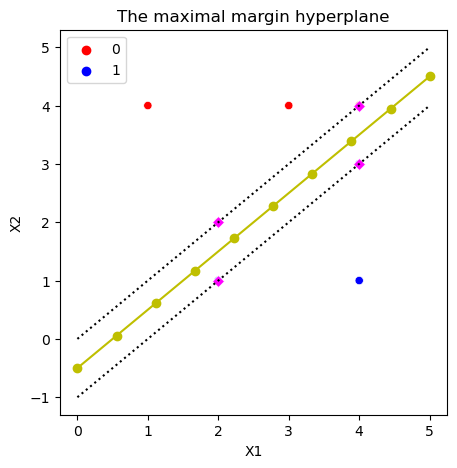

In [86]:
plt.figure(figsize=(5, 5))

support_vector_indices = svm.support_
sns.scatterplot(x=trainx[:, 0], y=trainx[:, 1], hue=trainy, palette=["red", "blue"])
sns.scatterplot(x=trainx[support_vector_indices, 0], y=trainx[support_vector_indices, 1], color='magenta', marker='D')

up = x
down = x - 1
plt.plot(x, up, color="black", linestyle='dotted')
plt.plot(x, down, color="black", linestyle='dotted')

plt.plot(x, y_plane, 'yo-')


plt.title("The maximal margin hyperplane")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

### (e) Indicate the support vectors for the maximal margin classifier.

#### The support vectors are the scatter points represented in <span style="color:Magenta">magenta</span> color in the above figure. The coordinates of the points are (2,1), (4,3), (2,2), and (4,4).

### (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane

### The seventh point is far away from the maximal margin hyperplane. Hence, its movement would not affect the maximal margin hyperplane. It still provides the best separation of observations.

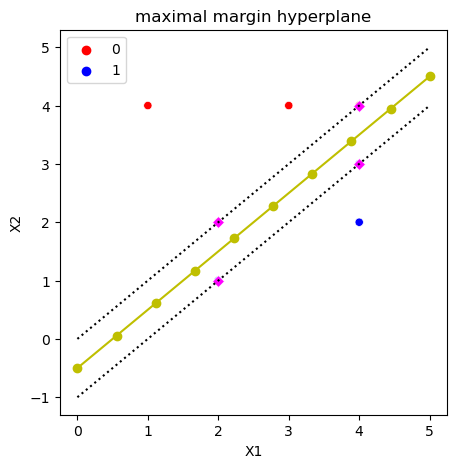

In [87]:
toy_data.loc[6, "X2"] = 2 #moving the seventh observation
trainx_7moved = toy_data.iloc[:, 0:2]
trainy_7moved = toy_data['Y'].map({"red": 0, "blue": 1})
#X_train_5e, y_train_5e = X_train_5e.values, y_train_5e.values
svm_f = SVC(kernel='linear').fit(trainx_7moved, trainy_7moved)
trainx_7moved=trainx_7moved.values
x = np.linspace(trainx_7moved[:, 0].min() - 1, trainx_7moved[:, 0].max() + 1, 10)
y_plane = x - 0.5
plt.figure(figsize=(5, 5))

support_vector_indices = svm_f.support_
sns.scatterplot(x=trainx_7moved[:, 0], y=trainx_7moved[:, 1], hue=trainy_7moved, palette=["red", "blue"])
sns.scatterplot(x=trainx_7moved[support_vector_indices, 0], y=trainx_7moved[support_vector_indices, 1], color='magenta', marker='D')

up = x
down = x - 1
plt.plot(x, up, color="black", linestyle='dotted')
plt.plot(x, down, color="black", linestyle='dotted')

plt.plot(x, y_plane, 'yo-')


plt.title("maximal margin hyperplane")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

no change in maximal matgin hyperplane seen

### (g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane

### The yellow line shown  is a hyperplane that is not the optimal separating hyperplane

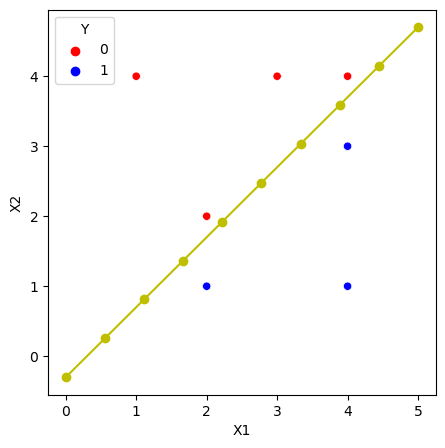

In [88]:
y_plane_g = x - 0.3

plt.figure(figsize=(5, 5))

sns.scatterplot(x=trainx[:, 0], y=trainx[:, 1], hue=trainy, palette=["red", "blue"])

plt.plot(x, y_plane_g, 'yo-')

plt.xlabel("X1")
plt.ylabel("X2")

plt.show()

#### Equation for this hyperplane is X<sub>2</sub> = X<sub>1</sub> - 0.3

### (h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

### The new point is added to the original data

In [89]:
new_data=toy_data
new_data.loc[len(new_data.index)]=[2,3,'blue']
new_data

,X1,X2,Y
0,3,4,red
1,2,2,red
2,4,4,red
3,1,4,red
4,2,1,blue
5,4,3,blue
6,4,2,blue
7,2,3,blue


In [90]:
trainx_new = new_data.iloc[:, 0:2]
trainy_new = new_data['Y'].map({"red": 0, "blue": 1})
trainx_new=trainx_new.values

In [91]:
svm_h = SVC(kernel='linear').fit(trainx_new, trainy_new)

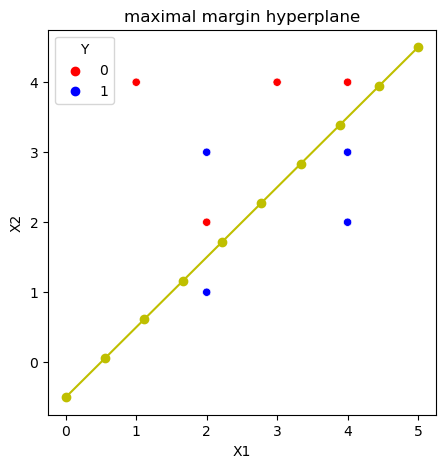

In [92]:
x = np.linspace(trainx_new[:, 0].min() - 1, trainx_new[:, 0].max() + 1, 10)
y_plane_h = x - 0.5

plt.figure(figsize=(5, 5))

sns.scatterplot(x=trainx_new[:, 0], y=trainx_new[:, 1], hue=trainy_new, palette=["red", "blue"])

plt.plot(x, y_plane_h, 'yo-')

plt.title("maximal margin hyperplane")
plt.xlabel("X1")
plt.ylabel("X2")

plt.show()

#### We see that the two classes are no longer seperable by a hyperplane

### References

#### https://scikit-learn.org/stable/modules/impute.html

#### https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html

#### https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html

#### https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

#### https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

#### https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7#:~:text=We%20first%20split%20the%20data,cross%2Dvalidation%20and%20test%20scores

#### https://stackoverflow.com/questions/76593906/how-to-resolve-cannot-import-name-missingvalues-from-sklearn-utils-param-v

#### https://machinelearningmastery.com/support-vector-machines-for-machine-learning/

#### https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/